<a href="https://colab.research.google.com/github/Mohanee28/06July2024/blob/main/Logistic_Regression_Hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv(r'/content/bank-additional-full-1.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41198,74.0,retired,married,professional.course,no,yes,NaN,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,NaN,-50.8,1.028,4963.6,no


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [59]:
df.isnull().sum()

,0
age,4
job,5
marital,5
education,5
default,4
housing,3
loan,4
contact,4
month,3
day_of_week,3


In [60]:
df.isnull().sum()/len(df) * 100

,0
age,0.009709
job,0.012136
marital,0.012136
education,0.012136
default,0.009709
housing,0.007282
loan,0.009709
contact,0.009709
month,0.007282
day_of_week,0.007282


In [61]:
df.dropna(inplace = True)

In [62]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


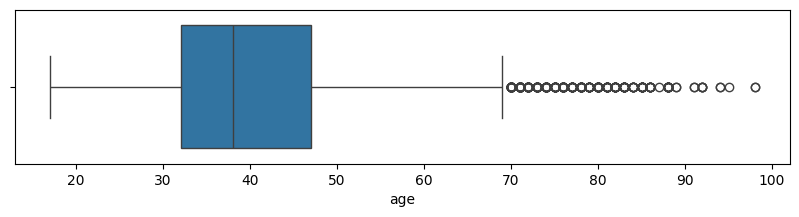

In [63]:
plt.figure(figsize = (10,2))
sns.boxplot(data = df, x = 'age')
plt.show()

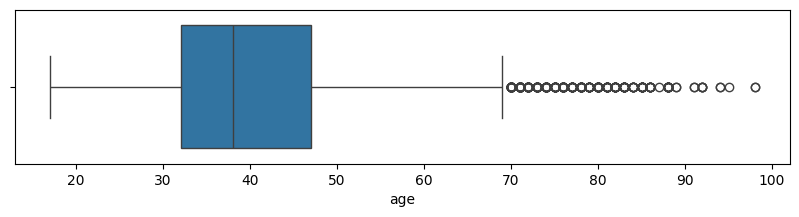

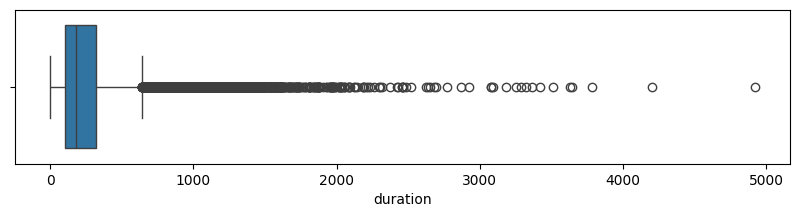

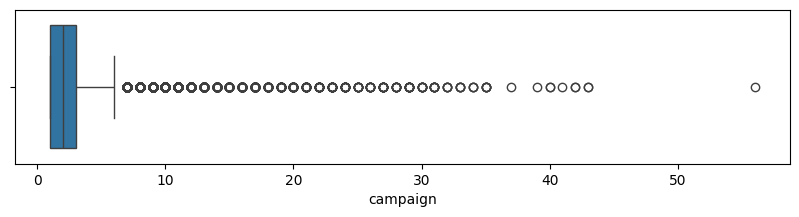

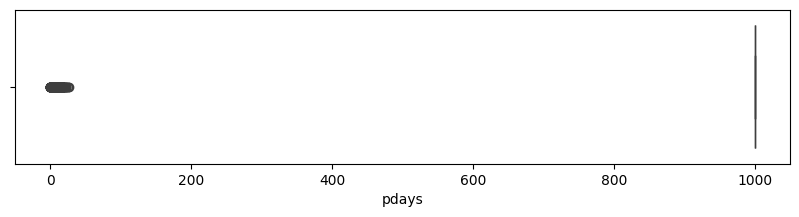

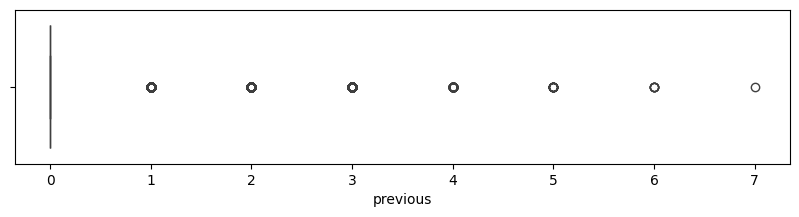

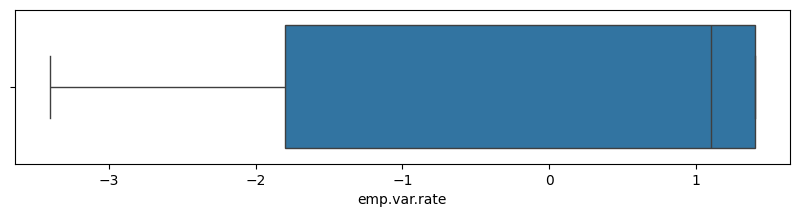

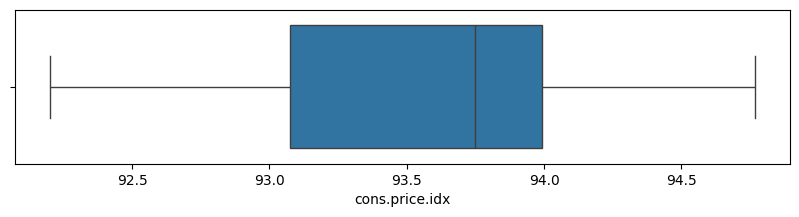

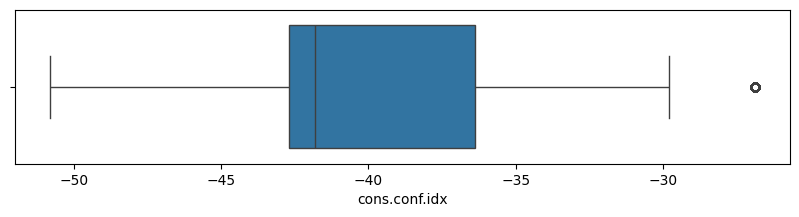

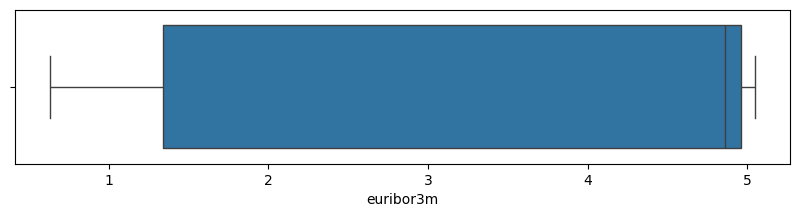

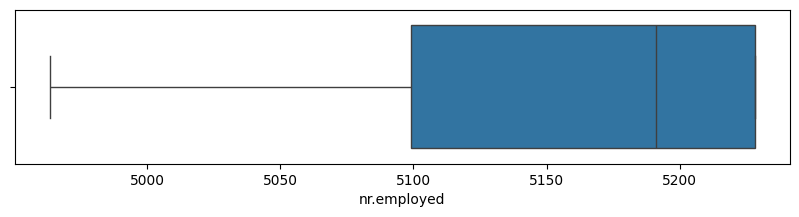

In [64]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure(figsize = (10,2))
    sns.boxplot(data = df, x = col)
    plt.show

In [65]:
out_col = ['age', 'duration', 'campaign', 'cons.conf.idx']

In [66]:
for col in out_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  UL = Q3+1.5*IQR
  LL = Q1-1.5*IQR
  df = df[(df[col]>LL) & (df[col]<UL)]


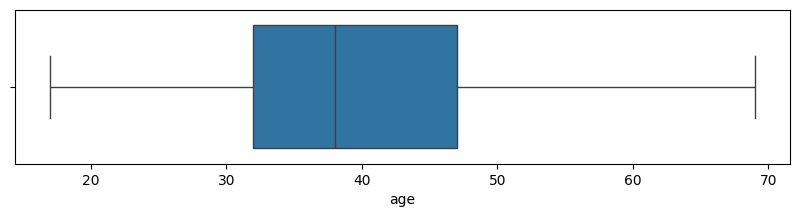

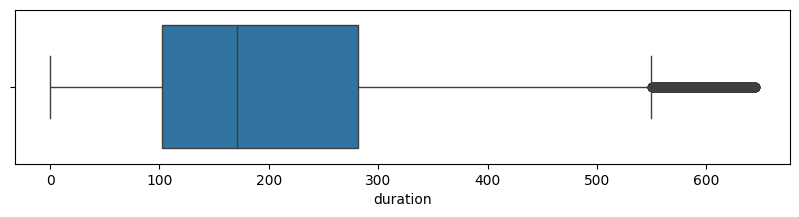

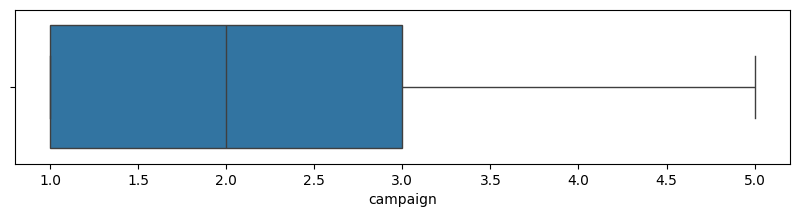

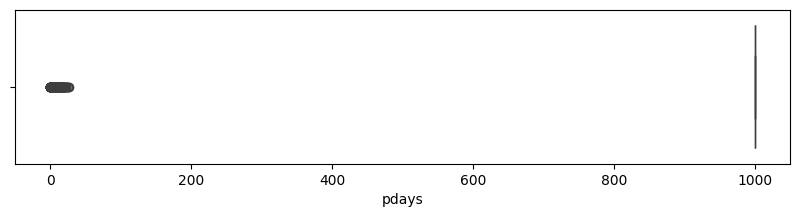

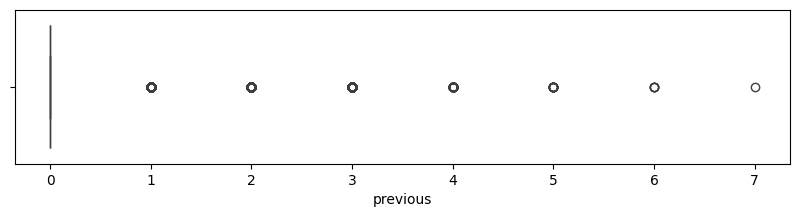

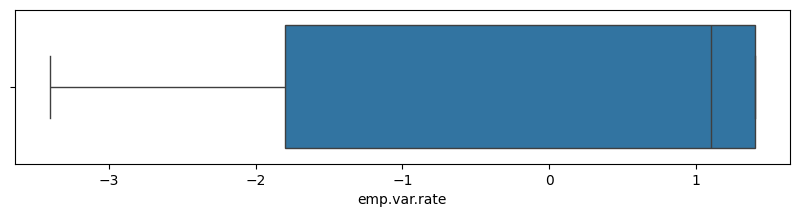

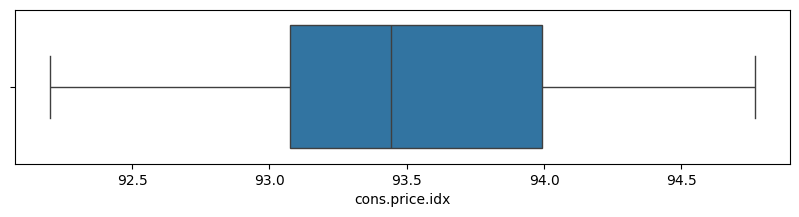

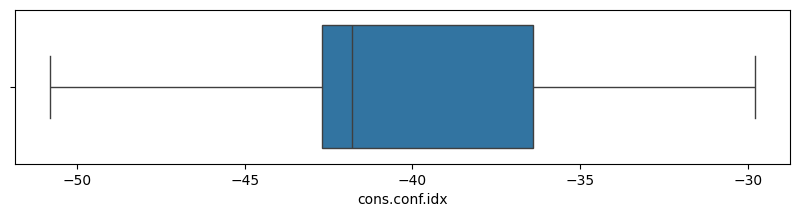

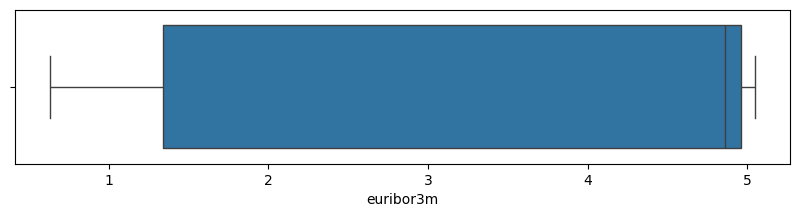

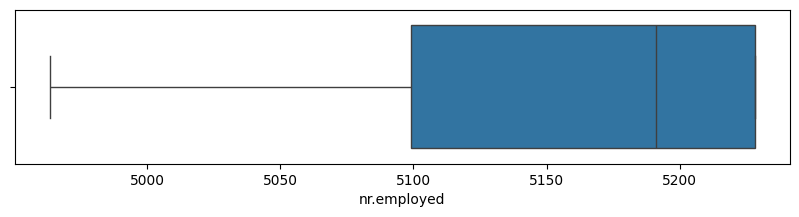

In [67]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure(figsize = (10,2))
    sns.boxplot(data = df, x = col)
    plt.show()

In [68]:
 col_list = []
 for col in df.columns:
  if (df[col].dtype == 'object') & (col != 'y'):
    col_list.append(col)

In [69]:
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [70]:
Bins = [0,50,100]

In [71]:
df['age'] = pd.cut(df['age'],Bins)

In [72]:
df['age'] = df['age'].astype('str')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34277 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34277 non-null  object 
 1   job             34277 non-null  object 
 2   marital         34277 non-null  object 
 3   education       34277 non-null  object 
 4   default         34277 non-null  object 
 5   housing         34277 non-null  object 
 6   loan            34277 non-null  object 
 7   contact         34277 non-null  object 
 8   month           34277 non-null  object 
 9   day_of_week     34277 non-null  object 
 10  duration        34277 non-null  float64
 11  campaign        34277 non-null  float64
 12  pdays           34277 non-null  float64
 13  previous        34277 non-null  float64
 14  poutcome        34277 non-null  object 
 15  emp.var.rate    34277 non-null  float64
 16  cons.price.idx  34277 non-null  float64
 17  cons.conf.idx   34277 non-null  floa

In [74]:
df['age'].value_counts()

,count
age,
"(0, 50]",28658
"(50, 100]",5619


In [75]:
from sklearn.preprocessing import LabelEncoder
La = LabelEncoder()

In [76]:
for col in col_list:
  if df[col].dtype == 'object':
    df[col] = La.fit_transform(df[col])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34277 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34277 non-null  object 
 1   job             34277 non-null  int64  
 2   marital         34277 non-null  int64  
 3   education       34277 non-null  int64  
 4   default         34277 non-null  int64  
 5   housing         34277 non-null  int64  
 6   loan            34277 non-null  int64  
 7   contact         34277 non-null  int64  
 8   month           34277 non-null  int64  
 9   day_of_week     34277 non-null  int64  
 10  duration        34277 non-null  float64
 11  campaign        34277 non-null  float64
 12  pdays           34277 non-null  float64
 13  previous        34277 non-null  float64
 14  poutcome        34277 non-null  int64  
 15  emp.var.rate    34277 non-null  float64
 16  cons.price.idx  34277 non-null  float64
 17  cons.conf.idx   34277 non-null  floa

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

In [80]:
x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

          Features           VIF
0              job      2.103485
1          marital      4.882358
2        education      4.551578
3          default      1.372998
4          housing      2.214402
5             loan      1.207673
6          contact      2.944847
7            month      6.651167
8      day_of_week      3.100586
9         duration      3.252651
10        campaign      4.037026
11           pdays    172.869690
12        previous      6.049287
13        poutcome     34.648183
14    emp.var.rate     37.214967
15  cons.price.idx  37725.398412
16   cons.conf.idx    141.835360
17       euribor3m    319.829916
18     nr.employed  43008.453555


In [81]:
df = df.drop(['nr.employed'], axis=1)

In [82]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

          Features         VIF
0              job    2.103255
1          marital    4.882125
2        education    4.550110
3          default    1.370651
4          housing    2.214067
5             loan    1.207631
6          contact    2.444849
7            month    5.747059
8      day_of_week    3.099730
9         duration    3.243895
10        campaign    4.025948
11           pdays  172.828752
12        previous    5.951102
13        poutcome   34.381717
14    emp.var.rate   21.981224
15  cons.price.idx  685.840977
16   cons.conf.idx  123.282828
17       euribor3m  128.819353


In [83]:
df = df.drop(['cons.price.idx'], axis = 1)

In [84]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

         Features        VIF
0             job   2.097527
1         marital   4.848234
2       education   4.503115
3         default   1.368038
4         housing   2.212262
5            loan   1.207026
6         contact   2.347785
7           month   5.675577
8     day_of_week   3.087238
9        duration   3.216955
10       campaign   4.003093
11          pdays  90.966598
12       previous   2.877006
13       poutcome  16.544424
14   emp.var.rate  15.915489
15  cons.conf.idx  81.730052
16      euribor3m  88.997353


In [85]:
df = df.drop(['pdays'], axis = 1)

In [86]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

         Features        VIF
0             job   2.093576
1         marital   4.814825
2       education   4.452890
3         default   1.365485
4         housing   2.208113
5            loan   1.206871
6         contact   2.266839
7           month   5.594324
8     day_of_week   3.075212
9        duration   3.202405
10       campaign   3.972954
11       previous   1.470620
12       poutcome   7.956166
13   emp.var.rate  11.375685
14  cons.conf.idx  38.886735
15      euribor3m  54.103715


In [87]:
df = df.drop(['euribor3m'], axis = 1)

In [88]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

         Features        VIF
0             job   2.084349
1         marital   4.789481
2       education   4.272684
3         default   1.361349
4         housing   2.196778
5            loan   1.206566
6         contact   2.249763
7           month   5.241875
8     day_of_week   3.028533
9        duration   3.188851
10       campaign   3.949647
11       previous   1.464215
12       poutcome   7.683715
13   emp.var.rate   1.538333
14  cons.conf.idx  20.738494


In [89]:
df = df.drop(['cons.conf.idx'], axis = 1)

In [90]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

        Features       VIF
0            job  2.056497
1        marital  4.361394
2      education  4.024615
3        default  1.322132
4        housing  2.116277
5           loan  1.200412
6        contact  2.239333
7          month  4.598342
8    day_of_week  2.891424
9       duration  3.014437
10      campaign  3.527190
11      previous  1.442117
12      poutcome  6.534877
13  emp.var.rate  1.531408


In [91]:
df = df.drop(['poutcome', 'previous'], axis = 1)

In [92]:
col_list = []
for col in df.columns:
  if (df[col].dtype != 'object') & (col != 'y'):
    col_list.append(col)

x = df[col_list]
vif_df = pd.DataFrame()
vif_df ['Features'] = x.columns
vif_df ['VIF'] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))]
print(vif_df)

        Features       VIF
0            job  2.035929
1        marital  4.148628
2      education  3.802057
3        default  1.313154
4        housing  2.085961
5           loan  1.198384
6        contact  2.212074
7          month  4.448063
8    day_of_week  2.807404
9       duration  2.858845
10      campaign  3.372713
11  emp.var.rate  1.354940


In [93]:
vif_df.Features

,Features
0,job
1,marital
2,education
3,default
4,housing
5,loan
6,contact
7,month
8,day_of_week
9,duration


In [94]:
ind_features = list(vif_df.Features)

In [95]:
x = df[ind_features]

In [96]:
y = df['y']

In [97]:
print(x)

       job  marital  education  default  housing  loan  contact  month  \
0        3        1          0        0        0     0        1      6   
1        7        1          3        1        0     0        1      6   
2        7        1          3        0        2     0        1      6   
3        0        1          1        0        0     0        1      6   
4        7        1          3        0        0     2        1      6   
...    ...      ...        ...      ...      ...   ...      ...    ...   
41181    0        1          6        0        2     0        0      7   
41182   10        2          0        0        2     0        0      7   
41184    1        1          5        0        0     0        0      7   
41185    5        1          6        0        2     0        0      7   
41186    9        1          5        0        0     0        0      7   

       day_of_week  duration  campaign  emp.var.rate  
0                1     261.0       1.0           1.1  
1

In [98]:
print(y)

0         no
1         no
2         no
3         no
4         no
        ... 
41181    yes
41182     no
41184     no
41185     no
41186    yes
Name: y, Length: 34277, dtype: object


In [99]:
#split data
from sklearn.model_selection import train_test_split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [101]:
x_test

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
9031,0,1,2,0,2,0,1,4,2,209.0,3.0,1.4
2901,7,1,1,0,0,0,1,6,4,80.0,1.0,1.1
24584,9,1,3,0,2,0,0,7,1,569.0,1.0,-0.1
764,9,1,5,0,0,0,1,6,4,479.0,2.0,1.1
22519,0,1,6,0,2,0,0,1,0,64.0,1.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...
9702,1,1,1,1,2,0,1,4,1,70.0,3.0,1.4
18417,7,1,3,0,1,1,0,3,2,81.0,4.0,1.4
8589,8,2,6,1,2,0,1,4,4,235.0,2.0,1.4
22357,0,2,6,0,0,0,0,1,2,42.0,1.0,1.4


In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
lr = LogisticRegression()

In [104]:
lr_model = lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
lr_model

LogisticRegression()

In [106]:
y_prid = lr.predict(x_test)
y_prid

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [107]:
#model validation
from sklearn.metrics import *

In [108]:
accuracy_score(y_test, y_prid)

0.9205075845974329

In [109]:
confusion_matrix(y_test, y_prid)

array([[6223,  105],
       [ 440,   88]])

In [110]:
(6223+88)/(6223+105+440+88)

0.9205075845974329